# Tarea -  MNIST

### Cargas

In [0]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from keras.datasets import mnist

In [0]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, MaxPool2D, Conv2D,Reshape

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
import warnings
warnings.filterwarnings('ignore')
from keras.utils import np_utils

np.random.seed(123) 

In [7]:
#cargar Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
#Normalizar
max_val = X_train.max()
X_train = X_train / max_val
X_test = X_test / max_val

### Modelo 1 -keras.models.Model

In [0]:
def my_nn(activation="relu", optimizer="adam", layers=(100, 200,100,50)):
  Xin = Input(shape=(28, 28))
  X = Flatten()(Xin)
  for layer in layers:
    X = Dense(layer, activation=activation)(X)
    X = Dropout(.3)(X)

  X = Dense(10, activation="softmax")(X)

  model = Model(inputs=Xin, outputs=X)

  model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
  model.summary()
  return model

In [10]:
tf.keras.backend.clear_session()
model = my_nn(layers=(500,400, 300, 200,100, 50),optimizer="adam")
model.fit(X_train, y_train, epochs=50,batch_size=32)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               200400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               120300

In [12]:
m1_test_loss, m1_test_accuracy = model.evaluate(X_test, y_test)
print("M1 - Test accuracy: {:.4f}".format(m1_test_accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.3789 - accuracy: 0.8798
M1 - Test accuracy: 0.8798


In [13]:
y_pred=np.argmax(model.predict(X_test), axis=-1)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
con_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[847,   2,   9,  32,   2,   2, 101,   0,   5,   0],
       [  1, 968,   1,  25,   2,   0,   2,   0,   1,   0],
       [ 12,   2, 743,  14, 125,   0, 103,   0,   1,   0],
       [ 15,   4,   6, 903,  38,   0,  30,   0,   3,   1],
       [  0,   0,  78,  35, 793,   0,  88,   0,   6,   0],
       [  0,   0,   0,   0,   0, 946,   0,  37,   2,  15],
       [134,   1,  66,  34,  56,   0, 701,   0,   8,   0],
       [  0,   0,   0,   0,   0,   5,   0, 984,   0,  11],
       [  3,   0,   0,   6,   2,   1,   5,   3, 980,   0],
       [  0,   0,   0,   0,   0,   3,   1,  63,   0, 933]], dtype=int32)>

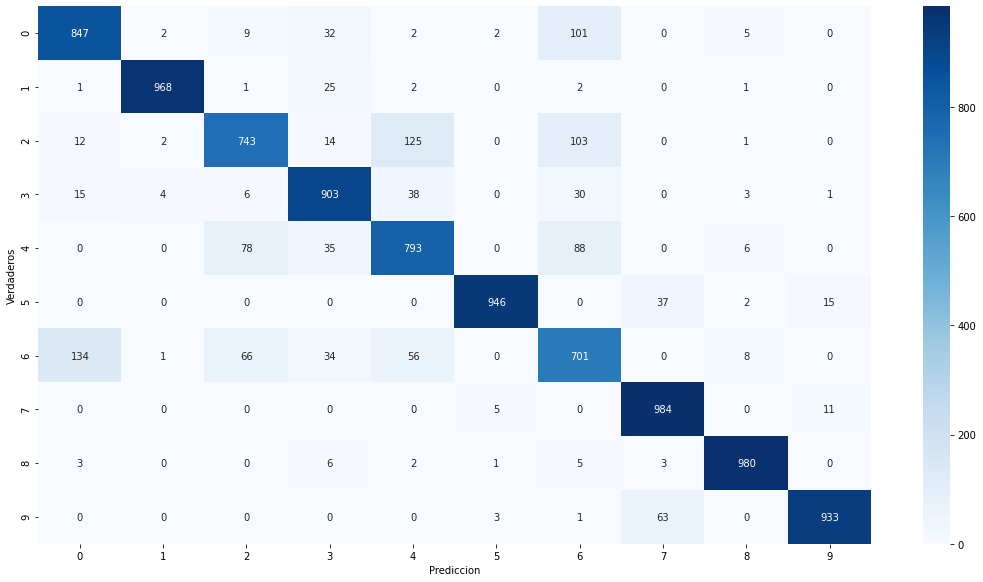

In [14]:
figure = plt.figure(figsize=(15, 8))
sns.heatmap(con_mat, annot=True,cmap=plt.cm.Blues,fmt="d")
plt.tight_layout()
plt.ylabel('Verdaderos')
plt.xlabel('Prediccion')
plt.show()

### Modelo 2 y 3  -keras.models.Sequential

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model.fit(X_train, y_train, epochs=50,batch_size=32)

Epoch 1/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6274 - accuracy: 0.7749
Epoch 2/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4584 - accuracy: 0.8379
Epoch 3/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4198 - accuracy: 0.8512
Epoch 4/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4001 - accuracy: 0.8582
Epoch 5/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3844 - accuracy: 0.8637
Epoch 6/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3692 - accuracy: 0.8690
Epoch 7/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3591 - accuracy: 0.8725
Epoch 8/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3506 - accuracy: 0.8738
Epoch 9/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3441 - accuracy: 0.8779
Epoch 10/50
1875/1875 [==============================] - 13s 7ms/step - l

In [21]:
m2_test_loss, m2_test_accuracy = model.evaluate(X_test, y_test)
print("M2 - Test accuracy: {:.4f}".format(m2_test_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8777
M2 - Test accuracy: 0.8777


In [18]:
y_pred=np.argmax(model.predict(X_test), axis=-1)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
con_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[842,   2,  21,  19,   5,   1, 105,   0,   5,   0],
       [  1, 983,   1,  10,   4,   0,   0,   0,   1,   0],
       [ 10,   1, 813,   8, 101,   1,  66,   0,   0,   0],
       [ 17,   9,  17, 882,  51,   0,  18,   0,   6,   0],
       [  1,   0,  81,  22, 854,   0,  39,   0,   3,   0],
       [  0,   0,   0,   0,   0, 969,   0,  21,   2,   8],
       [130,   0,  89,  24,  91,   0, 656,   0,  10,   0],
       [  0,   0,   0,   0,   0,   8,   0, 967,   0,  25],
       [  2,   0,   1,   4,   5,   2,   4,   2, 979,   1],
       [  1,   0,   0,   0,   0,   5,   0,  35,   0, 959]], dtype=int32)>

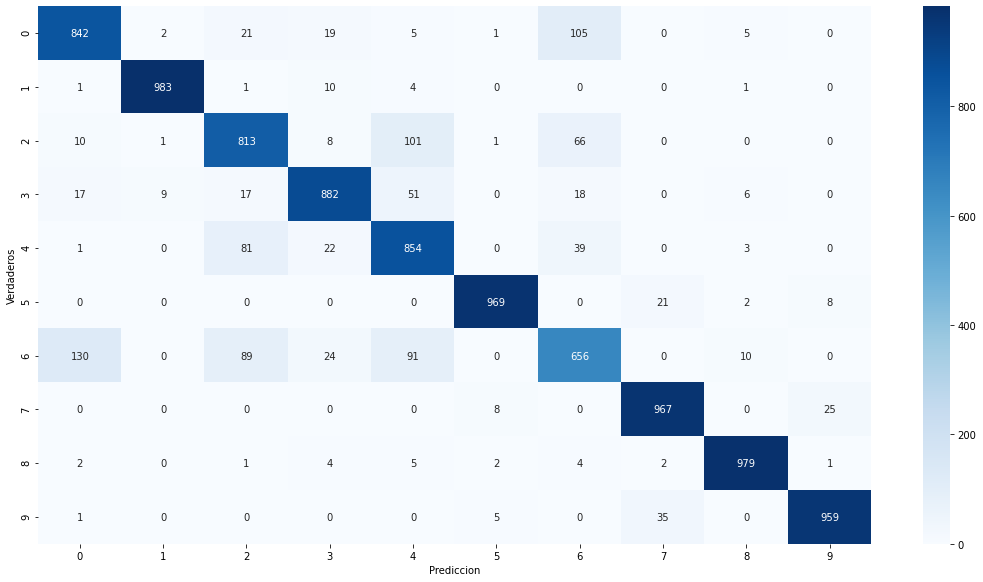

In [19]:
figure = plt.figure(figsize=(15, 8))
sns.heatmap(con_mat, annot=True,cmap=plt.cm.Blues,fmt="d")
plt.tight_layout()
plt.ylabel('Verdaderos')
plt.xlabel('Prediccion')
plt.show()

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5548 - accuracy: 0.8015
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4377 - accuracy: 0.8403
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4055 - accuracy: 0.8521
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3854 - accuracy: 0.8582
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3763 - accuracy: 0.8630
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3585 - accuracy: 0.8676
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3530 - accuracy: 0.8715
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3448 - accuracy: 0.8731
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3415 - accuracy: 0.8741
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.332

In [22]:
m3_test_loss, m3_test_accuracy = model.evaluate(X_test, y_test)
print("M3 - Test accuracy: {:.4f}".format(m3_test_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8777
M3 - Test accuracy: 0.8777


In [23]:
y_pred=np.argmax(model.predict(X_test), axis=-1)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
con_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[870,   3,   9,  16,   7,   0,  87,   0,   8,   0],
       [  2, 975,   1,  17,   2,   0,   1,   0,   2,   0],
       [ 23,   1, 773,   6, 133,   0,  62,   0,   2,   0],
       [ 26,  15,   9, 877,  37,   0,  32,   0,   4,   0],
       [  0,   1,  96,  26, 841,   0,  35,   0,   1,   0],
       [  0,   0,   0,   0,   0, 954,   0,  28,   1,  17],
       [159,   2,  81,  26, 123,   0, 592,   0,  17,   0],
       [  0,   0,   0,   0,   0,   7,   0, 966,   0,  27],
       [  6,   0,   2,   3,   6,   1,   2,   4, 976,   0],
       [  1,   0,   0,   0,   0,   4,   0,  42,   0, 953]], dtype=int32)>

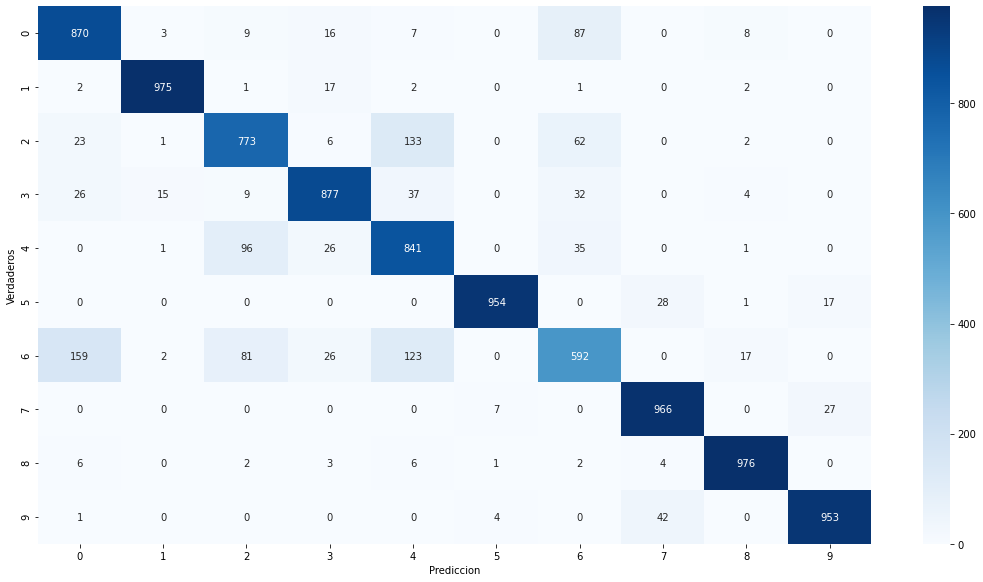

In [24]:
figure = plt.figure(figsize=(15, 8))
sns.heatmap(con_mat, annot=True,cmap=plt.cm.Blues,fmt="d")
plt.tight_layout()
plt.ylabel('Verdaderos')
plt.xlabel('Prediccion')
plt.show()

### Modelo 4  -keras.models.Sequential + Kfold cross Val

In [0]:
def create_model():
  model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])
  return model

In [26]:
from sklearn.model_selection import KFold
 
n_split=5
 
for train_index,test_index in KFold(n_split).split(X_test):
  x_train2,x_test2=X_test[train_index],X_test[test_index]
  y_train2,y_test2=y_test[train_index],y_test[test_index]
  
  model=create_model()
  model.fit(x_train2, y_train2, epochs=30,batch_size=32)
  
  print('Model evaluation ',model.evaluate(x_test2,y_test2))

Epoch 1/30
250/250 [==============================] - 1s 5ms/step - loss: 1.0629 - accuracy: 0.6158
Epoch 2/30
250/250 [==============================] - 1s 5ms/step - loss: 0.7251 - accuracy: 0.7331
Epoch 3/30
250/250 [==============================] - 1s 5ms/step - loss: 0.6472 - accuracy: 0.7656
Epoch 4/30
250/250 [==============================] - 1s 5ms/step - loss: 0.6240 - accuracy: 0.7692
Epoch 5/30
250/250 [==============================] - 1s 5ms/step - loss: 0.5831 - accuracy: 0.7865
Epoch 6/30
250/250 [==============================] - 1s 4ms/step - loss: 0.5640 - accuracy: 0.7955
Epoch 7/30
250/250 [==============================] - 1s 5ms/step - loss: 0.5394 - accuracy: 0.8024
Epoch 8/30
250/250 [==============================] - 1s 5ms/step - loss: 0.5209 - accuracy: 0.8055
Epoch 9/30
250/250 [==============================] - 1s 5ms/step - loss: 0.4981 - accuracy: 0.8170
Epoch 10/30
250/250 [==============================] - 1s 5ms/step - loss: 0.4999 - accuracy: 0.8169

In [27]:
m4_test_loss, m4_test_accuracy = model.evaluate(x_test2,y_test2)
print("M4 - Test accuracy: {:.4f}".format(m4_test_accuracy))

63/63 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8450
M4 - Test accuracy: 0.8450


In [28]:
y_pred=np.argmax(model.predict(X_test), axis=-1)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
con_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[873,   1,   6,  11,   5,   0,  98,   0,   6,   0],
       [  1, 968,   4,  16,   4,   0,   4,   0,   3,   0],
       [ 16,   0, 733,   5, 166,   0,  78,   0,   2,   0],
       [ 35,   0,   5, 872,  59,   0,  26,   0,   3,   0],
       [  0,   0,  57,  10, 851,   0,  82,   0,   0,   0],
       [  0,   0,   0,   0,   0, 969,   0,  18,   0,  13],
       [127,   0,  81,  11,  67,   0, 704,   0,  10,   0],
       [  0,   0,   0,   0,   0,   5,   0, 948,   0,  47],
       [  2,   0,   1,   1,   3,   1,   5,   1, 986,   0],
       [  0,   0,   0,   0,   0,   2,   0,  17,   0, 981]], dtype=int32)>

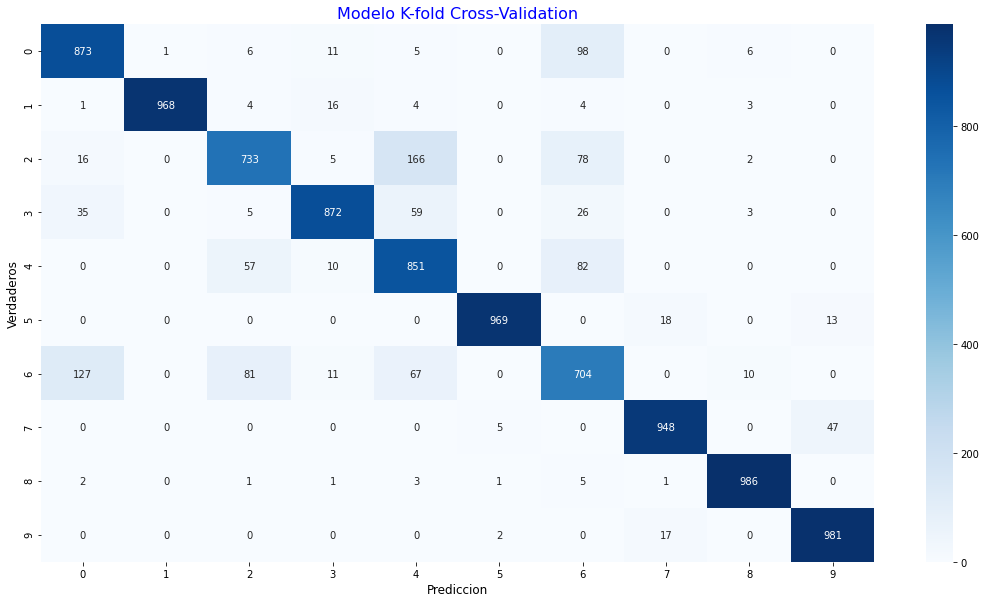

In [29]:
figure = plt.figure(figsize=(15, 8))
sns.heatmap(con_mat, annot=True,cmap=plt.cm.Blues,fmt="d")
plt.tight_layout()
plt.ylabel('Verdaderos',fontdict={'fontsize': 12})
plt.xlabel('Prediccion',fontdict={'fontsize': 12})
plt.title('Modelo K-fold Cross-Validation',fontdict={'fontsize': 16,'color':'b'})
plt.show()

### Modelo 5 convultional nn

In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
np.random.seed(123) # for reproducibility
from keras.models import Sequential
from keras.layers import Flatten, MaxPool2D, Conv2D, Dense, Reshape, Dropout
from keras.utils import np_utils
#Using TensorFlow backend.
from keras.datasets import mnist


In [0]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
model = Sequential()
model.add(Conv2D(32, 3, 3, activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(32, 3, 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [68]:
model.fit(X_train, Y_train, batch_size = 32, epochs = 10, verbose = 1)

Epoch 1/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0270 - accuracy: 0.9916
Epoch 2/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0247 - accuracy: 0.9921
Epoch 3/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0235 - accuracy: 0.9924
Epoch 4/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0231 - accuracy: 0.9931
Epoch 5/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0207 - accuracy: 0.9934
Epoch 6/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0203 - accuracy: 0.9934
Epoch 7/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0199 - accuracy: 0.9934
Epoch 8/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0194 - accuracy: 0.9938
Epoch 9/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0184 - accuracy: 0.9939
Epoch 10/10
60000/60000 [=====================

In [0]:
m5_test_loss, m5_test_accuracy = model.evaluate(X_test,Y_test)
print("M5 - Test accuracy: {:.4f}".format(m5_test_accuracy))

In [64]:
y_pred=np.argmax(model.predict(X_test), axis=-1)
Y_test2=np.argmax(Y_test, axis=-1)
con_mat = tf.math.confusion_matrix(labels=Y_test2, predictions=y_pred)
con_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    1,    0,    0,    0,    1,    2,    1,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,    2, 1018,    0,    2,    0,    1,    7,    0,    0],
       [   0,    0,    1, 1005,    0,    2,    0,    1,    1,    0],
       [   0,    0,    0,    0,  978,    0,    3,    0,    0,    1],
       [   2,    0,    0,    3,    0,  886,    1,    0,    0,    0],
       [   3,    2,    0,    0,    1,    1,  951,    0,    0,    0],
       [   0,    2,    4,    0,    0,    0,    0, 1021,    1,    0],
       [   3,    1,    5,    2,    0,    0,    2,    2,  956,    3],
       [   0,    1,    0,    0,   10,    5,    0,    6,    3,  984]],
      dtype=int32)>

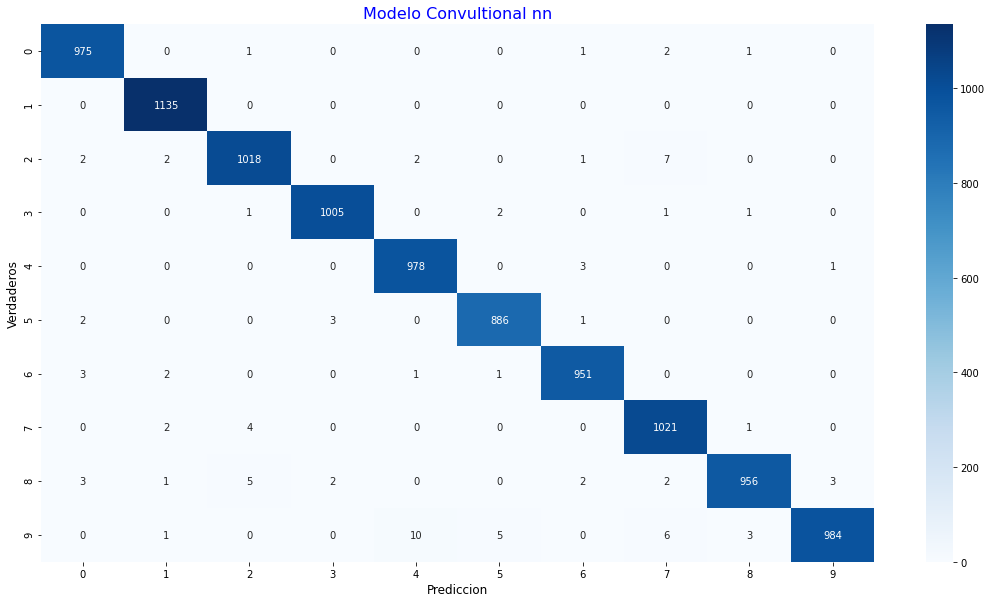

In [65]:
figure = plt.figure(figsize=(15, 8))
sns.heatmap(con_mat, annot=True,cmap=plt.cm.Blues,fmt="d")
plt.tight_layout()
plt.ylabel('Verdaderos',fontdict={'fontsize': 12})
plt.xlabel('Prediccion',fontdict={'fontsize': 12})
plt.title('Modelo Convultional nn',fontdict={'fontsize': 16,'color':'b'})
plt.show()

In [76]:
print("M1 - Test accuracy: {:.4f}".format(m1_test_accuracy))
print("M2 - Test accuracy: {:.4f}".format(m2_test_accuracy))
print("M3 - Test accuracy: {:.4f}".format(m3_test_accuracy))
print("M4 - Test accuracy: {:.4f}".format(m4_test_accuracy))
print("M5 - Test accuracy: {:.4f}".format(m5_test_accuracy))

M1 - Test accuracy: 0.8798
M2 - Test accuracy: 0.8777
M3 - Test accuracy: 0.8777
M4 - Test accuracy: 0.8450
M5 - Test accuracy: 0.9909
